<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Lab 3: Logistic Regression & K-nearest Neighbors</h1>
    <h3></h3>
</center>

## <center> Case 1: Classification of the diabetic status

## Coding section (Preview)

<font face="Times New Roman">The diabetic status of the patients can be roughly classified according to their age and BMI.</font>

病人是否患糖尿病可以根据他们的年龄（岁）和BMI（kg/m2）进行初步分类。

### 1.1 Data processing

In [34]:
# Load Python packages
import pandas as pd  # pip install pandas
from matplotlib import pyplot as plt  # pip install matplotlib
from sklearn.model_selection import train_test_split

In [35]:
# Load raw data
data = pd.read_csv('Diabetic_status_data.csv')  # Returns a pandas DataFrame object
X = data[['Age', 'BMI']]
Y = data['Diabetes']

In [36]:
# Display part of raw data
data.head(10)
print(data.head(10))  # Display the first 10 rows of DataFrame

   Age   BMI  Diabetes
0   54  23.8         0
1   49  26.7         0
2   55  27.0         0
3   62  25.6         0
4   48  27.5         0
5   48  29.2         0
6   63  33.7         1
7   56  28.5         0
8   46  28.8         0
9   54  27.8         0


Text(0, 0.5, 'BMI (kg/m^2)')

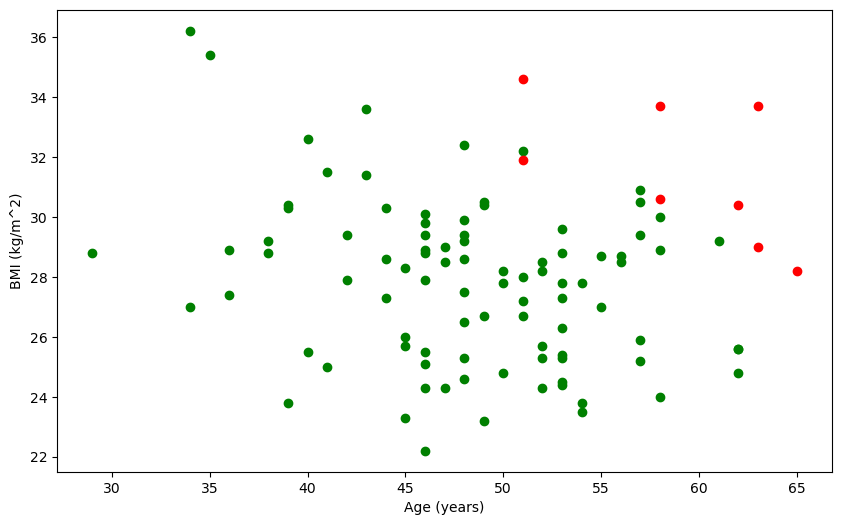

In [37]:
# Visualize the distribution on X1 of raw data
plt.figure(figsize=(10, 6))
# 未患糖尿病的患者
plt.scatter(data[data['Diabetes'] == 0]['Age'], data[data['Diabetes'] == 0]['BMI'],
            color='green', label='No Diabetes')
# 患糖尿病的患者
plt.scatter(data[data['Diabetes'] == 1]['Age'], data[data['Diabetes'] == 1]['BMI'],
            color='red', label='Diabetes')
plt.xlabel('Age (years)')
plt.ylabel('BMI (kg/m^2)')
# plt.show()

绿色的点表示未患糖尿病的患者，红色的点表示患糖尿病的患者

In [38]:
# obtain training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)

### 1.2 Model training and prediction

In [39]:
# Build a linear regression model and fit the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train.values,y_train.values)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
# Prediction
y_pred = model.predict(X_test.values)


### 1.3 Performance metrics

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
# 评估模型
print("分类报告：")
print(classification_report(y_test, y_pred))

分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



precision：精确率，表示预测为正例的样本中真正为正例的比例。精确率越高，说明模型预测为正例的样本中，真正为正例的样本越多。

recall：召回率，表示真正为正例的样本中被预测为正例的比例。召回率越高，说明模型找出了越多的真正正例。

f1-score：F1分数，是精确率和召回率的调和平均数。F1分数越高，说明模型在精确率和召回率之间取得了更好的平衡。

support：支持数，即该类别的样本数。

## 3 Visualizing results

### 3.1 Confusion Matrix

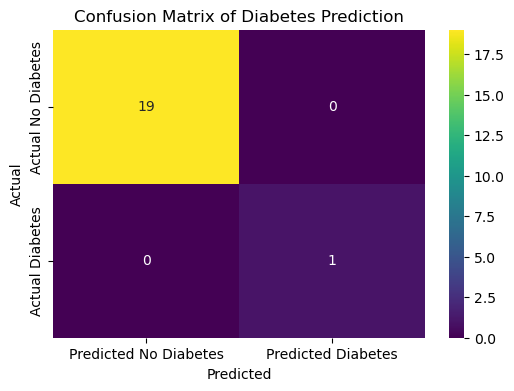

In [42]:
import seaborn as sns
import numpy as np
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建一个 DataFrame，用于绘制热力图
cm_df = pd.DataFrame(cm, index=['Actual No Diabetes', 'Actual Diabetes'],
                     columns=['Predicted No Diabetes', 'Predicted Diabetes'])

# 绘制混淆矩阵的热力图
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix of Diabetes Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 3.2 Decision boundary

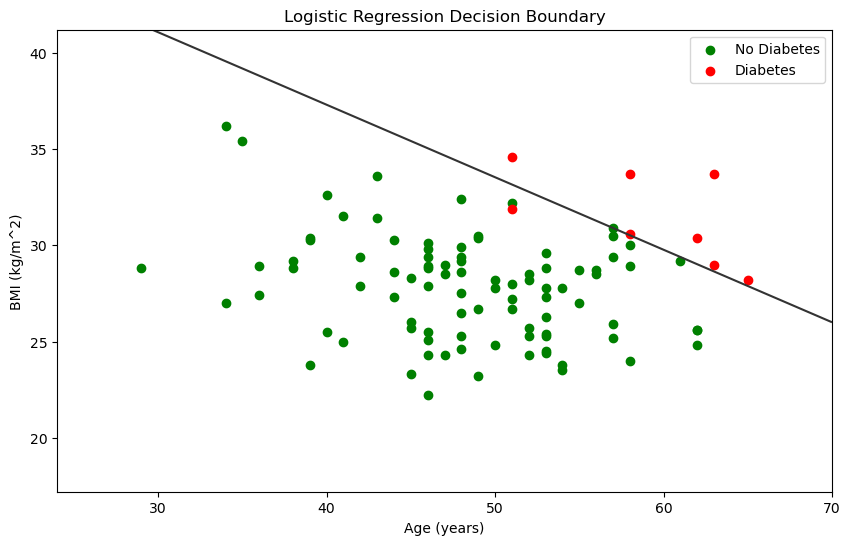

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Diabetes'] == 0]['Age'], data[data['Diabetes'] == 0]['BMI'],
            color='green', label='No Diabetes')
plt.scatter(data[data['Diabetes'] == 1]['Age'], data[data['Diabetes'] == 1]['BMI'],
            color='red', label='Diabetes')
age_min, age_max = data['Age'].min() - 5, data['Age'].max() + 5
bmi_min, bmi_max = data['BMI'].min() - 5, data['BMI'].max() + 5
xx, yy = np.meshgrid(np.linspace(age_min, age_max, 200),
                     np.linspace(bmi_min, bmi_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)
plt.xlabel('Age (years)')
plt.ylabel('BMI (kg/m^2)')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

In [44]:
print('The weight coefficient is' + str(model.coef_))
print('The bias coefficient is:' + str(model.intercept_))

The weight coefficient is[[0.48099648 1.27698918]]
The bias coefficient is:[-66.87601993]


Thus, the equation of the decision boundary logistic regression is:
0.48X1 + 1.28X2 - 66.88 = 0